<a href="https://colab.research.google.com/github/Hung392001/css-course-content/blob/master/NhanDangCamXuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from sklearn.model_selection import train_test_split

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [27]:
with open('dataemotion.pickle','rb') as f:
  (x_train, y_train)=pickle.load(f)

  # Reshape Data
x_pre_1 = x_train[120]
x_pre_2 = x_train[140]
x_pre_3 = x_train[160]
x_pre_4 = x_train[180]


# Tiền xử lý dữ liệu
x_train = x_train.astype('float32')
x_train /= 255

# Mã hóa Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 27s 9s/step - loss: 4.6220 - acc: 0.3280 - val_loss: 0.9289 - val_acc: 0.7447
Epoch 2/15
3/3 [==============================] - 26s 9s/step - loss: 0.8566 - acc: 0.7581 - val_loss: 1.2668 - val_acc: 0.7447
Epoch 3/15
3/3 [==============================] - 26s 9s/step - loss: 0.7634 - acc: 0.7903 - val_loss: 0.7965 - val_acc: 0.6809
Epoch 4/15
3/3 [==============================] - 26s 9s/step - loss: 0.4941 - acc: 0.8011 - val_loss: 0.8614 - val_acc: 0.7021
Epoch 5/15
3/3 [==============================] - 26s 9s/step - loss: 0.4135 - acc: 0.8495 - val_loss: 1.0038 - val_acc: 0.6596
Epoch 6/15
3/3 [==============================] - 26s 9s/step - loss: 0.3186 - acc: 0.8548 - val_loss: 1.0886 - val_acc: 0.6596
Epoch 7/15
3/3 [==============================] - 27s 9s/step - loss: 0.2081 - acc: 0.9247 - val_loss: 1.1894 - val_acc: 0.7447
Epoch 8/15
3/3 [==============================] - 26s 9s/step - loss: 0.1403 - acc: 0.9624 - val_loss: 1.5622 - val

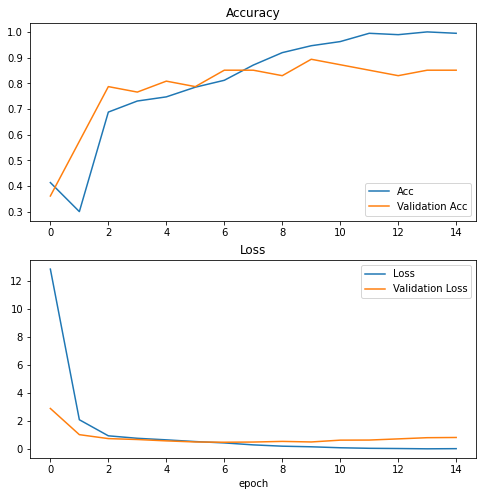

In [19]:
plot_history(his)

In [20]:
label = ['Happy', 'Sad', 'Fear', 'Angry']

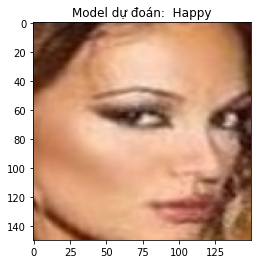

In [21]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

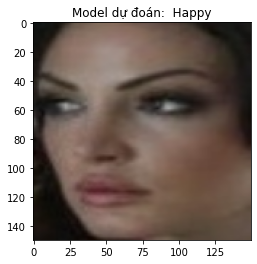

In [22]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

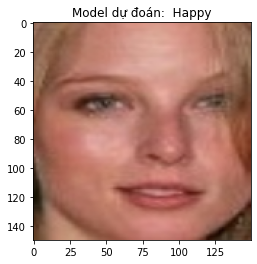

In [24]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

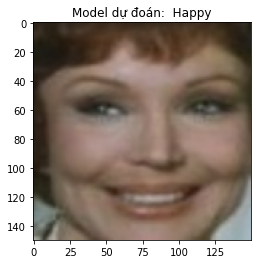

In [26]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))